## 1.5 Text Mining

### Importing Libraries

In [1]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vickyczada/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vickyczada/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vickyczada/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Importing text file

In [2]:
file_path = '/Users/vickyczada/Library/CloudStorage/OneDrive-Personal/Documents/Career Foundry/Data Visualisation with Python/20th-century/20th_Century_Wiki_2.txt'

In [3]:
# Import txt file

try:
    with open(file_path, 'r', errors='ignore') as file:
        data = file.read().replace('\n', ' ')
    print("File successfully read.")
except FileNotFoundError:
    print(f"File not found: {file_path}")

File successfully read.


### Tokenization

In [4]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['    Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages                    Search            Search                       Appearance                 Donate  Create account  Log in         Personal tools      Donate Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 World at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914–1918)           1.2 Spanish flu       1.2.1 Russian Revolution and communism           1.3 Between the wars       1.3.1 Economic depression 

In [5]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', '``', 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914–1918', ')', '1.2', 'Spanish', 'flu', '1.2.

In [6]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4908 samples and 22286 outcomes>


In [7]:
dist_words.most_common(10)

[('.', 1616),
 ('the', 1134),
 (',', 980),
 ('of', 625),
 ('and', 410),
 ('to', 333),
 ('The', 330),
 ('[', 309),
 (']', 309),
 ('in', 304)]

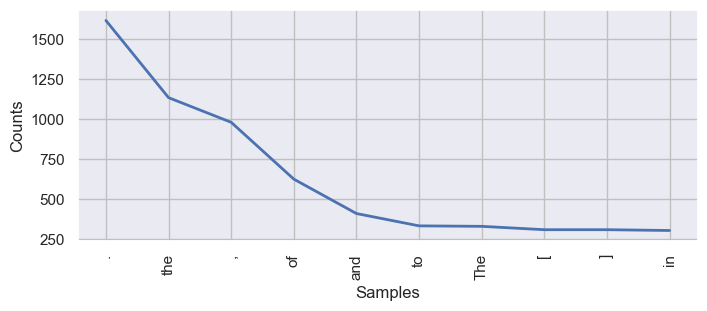

In [8]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

### Removing Stop words and reruning plot

In [9]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'no', 'not', 'only', "he's", 'those', 'now', 'wouldn', "she's", "didn't", 'having', 'most', "wasn't", 'be', 'when', 'm', "it'd", 'the', 'who', 'into', 'has', 'won', "you'd", 'so', 'same', "it's", 'don', 're', 'ourselves', 's', "hasn't", "wouldn't", 'in', 'some', "i've", "weren't", 'each', 'by', "he'll", 'been', 'itself', "isn't", 'further', 'our', 'off', 'being', 'an', 'didn', 'ours', 'it', 'shan', 'out', 'any', 'can', 'their', 'my', 'above', 'or', "they're", "they've", 'that', "hadn't", 'theirs', 'himself', 'such', 'do', 'couldn', 'below', 'because', 'how', 'was', 'o', 'as', 'here', "i'm", "we're", 'had', "you've", 'just', 'will', 'before', 'with', 'themselves', "you'll", 'from', 'both', 'herself', 'they', 'if', 'myself', "we've", 'until', 'than', 'which', "it'll", 'but', 'his', 'these', 'your', 'yours', 'this', 'mightn', 'under', "don't", 'there', 'haven', "she'd", 'isn', 'during', 'hadn', 'ain', "needn't", 't', 'against', 'about', 'hers', 'very', 'he', 'to', 've', 'other', "we'd", 

In [10]:
# Removing stopwords in words

filtered_words = [] 
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [11]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'Wikipedia',
 'Jump',
 'content',
 'Main',
 'menu',
 'Main',
 'menu',
 'move',
 'sidebar',
 'hide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSpecial',
 'pages',
 'Search',
 'Search',
 'Appearance',
 'Donate',
 'Create',
 'account',
 'Log',
 'Personal',
 'tools',
 'Donate',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'ContributionsTalk',
 'Contents',
 'move',
 'sidebar',
 'hide',
 '(',
 'Top',
 ')',
 '1',
 'Historic',
 'events',
 '20th',
 'century',
 'Toggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection',
 '1.1',
 'World',
 'beginning',
 'century',
 '1.1.1',
 '``',
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914–1918',
 ')',
 '1.2',
 'Spanish',
 'flu',
 '1.2.1',
 'Russian',
 'Revolution',
 'communism',
 '1.3

In [12]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4804 samples and 17497 outcomes>


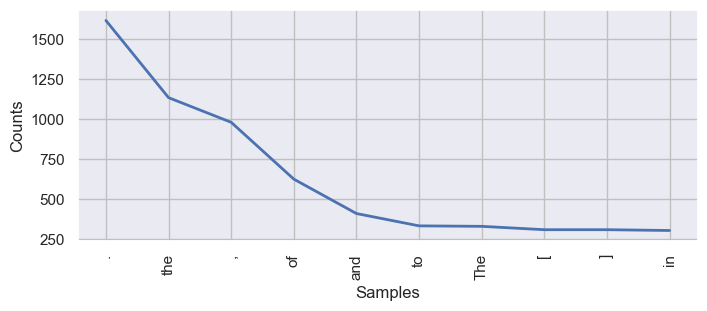

In [13]:
# Frequency Distribution Plot with filtered words

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

In [14]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [15]:
sans_punc

'  Key    events      th    century         Wikipedia    Jump    content    Main    menu    Main    menu    move    sidebar    hide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSpecial    pages    Search    Search    Appearance    Donate    Create    account    Log    Personal    tools    Donate    Create    account    Log    Pages    logged    editors    learn    ContributionsTalk    Contents    move    sidebar    hide         Top              Historic    events      th    century    Toggle    Historic    events      th    century    subsection           World    beginning    century                   The    war    end    wars               World    War    I                                  Spanish    flu             Russian    Revolution    communism           Between    wars             Economic    depression             The    rise    dictato

In [16]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Spanish', 'flu', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', '

In [17]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

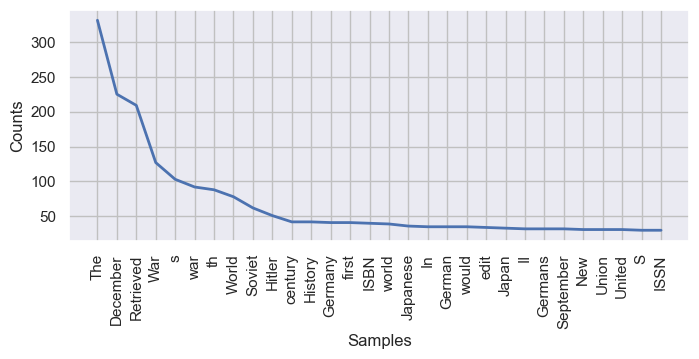

In [18]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

### POS Tags with Textblob

In [19]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The', 'In', 'S', 'A', 'th']

In [20]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [21]:
%%time
text = TextBlob(str(filtered))

CPU times: user 2.23 ms, sys: 66 μs, total: 2.3 ms
Wall time: 2.29 ms


In [22]:
tags_list = text.tags

In [23]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSpecial", 'NNP'),
 ("'", 'POS'),
 ("'pages", 'NNS'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Donate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'accoun

In [24]:
df_text = pd.DataFrame(tags_list)
df_text.columns = [ 'Words', "Word type"]
df_t=df_text.groupby('Word type').count().reset_index()
top10=df_t.nlargest(10, 'Words')

In [25]:
top10.head()

,Word type,Words
13,POS,6939
11,NNP,5614
12,NNS,1070
16,VBD,868
10,NN,396


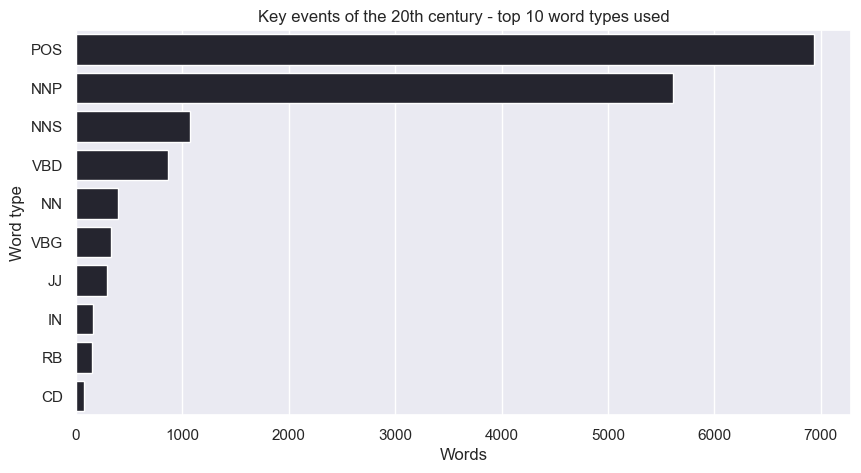

In [26]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("Key events of the 20th century - top 10 word types used")

Nouns

In [27]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15_noun = y.nlargest(15, 'Occurences')

In [28]:
top15_noun

,Word,Occurences
305,'December,225
1309,'War,127
2653,'war,92
1356,'World,78
1150,'Soviet,62
561,'Hitler,51
560,'History,42
1547,'century,42
1835,'first,41
584,'ISBN,40


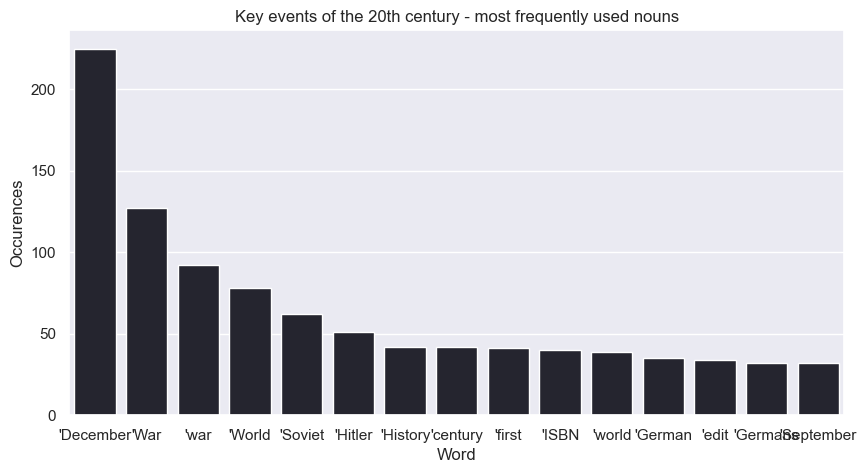

In [29]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15_noun).set_title("Key events of the 20th century - most frequently used nouns")

The frequency chart highlights key themes of the 20th century. "December" stands out with high occurrences, possibly indicating a focus on events in that month. Words like "War" and "World" emphasize the significance of the world wars, while "Soviet" and "Hitler" underscore major figures and conflicts of the era. "History" and "Century" provide a broad context, and the mention of "ISBN" suggests a bibliographic focus. Overall, the chart reflects the century’s major themes: global conflicts, influential leaders, and the importance of historical documentation.

Verbs

In [30]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15_verb = y.nlargest(15, 'Occurences')

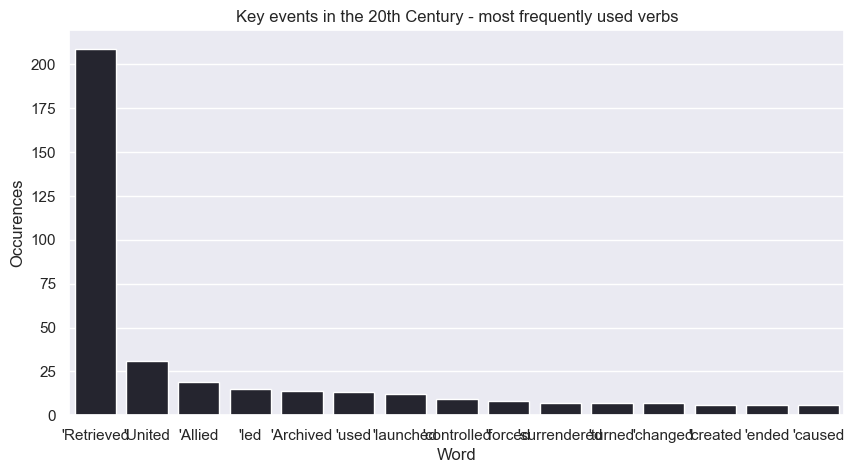

In [31]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15_verb).set_title("Key events in the 20th Century - most frequently used verbs")

The data shows that "Retrieved" is by far the most frequently used verb, indicating a focus on collecting or accessing information. Other common verbs like "United," "Allied," "led," and "used" suggest themes of collaboration, leadership, and action. The prominence of these words reflects the emphasis on historical events involving alliances,Discovery, and decision-making during the 20th century. Overall, the frequencies highlight key themes of retrieval, alliance, leadership, and action in historical narratives of the period.

Adjectives

In [32]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15_adject = y.nlargest(15, 'Occurences')

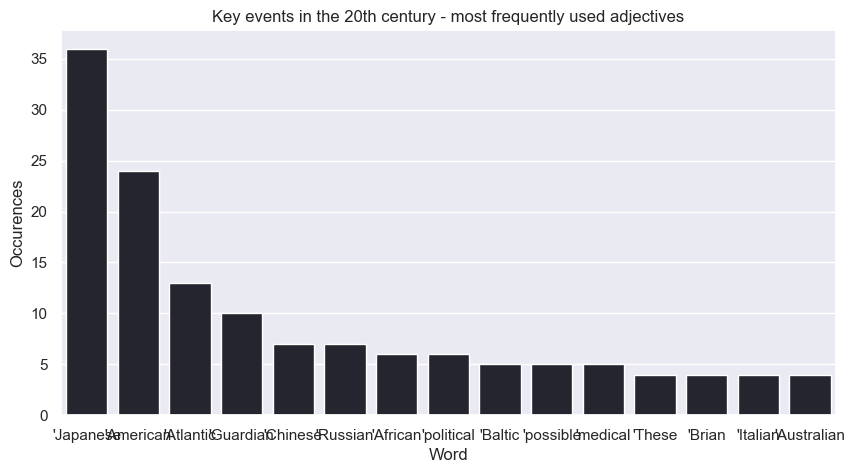

In [33]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15_adject).set_title("Key events in the 20th century - most frequently used adjectives")

The most notable trend is the dominance of "Japanese," indicating a focus on Japan's role in the 20th century. Other frequently used adjectives like "American," "Atlantic," and "Russian" reflect key geopolitical regions and nations. Words like "African," "political," and "possible" suggest themes of global diversity and political developments. Overall, the frequencies highlight significant international themes, with an emphasis on Japan’s prominence and the geopolitical landscape involving Western and Asian countries.

### Countries and the number of times they’re mentioned in the text 

In [34]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events century Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload fileSpecial pages Search Search Appearance Donate Create account Log Personal tools Donate Create account Log Pages logged editors learn ContributionsTalk Contents move sidebar hide Top Historic events century Toggle Historic events century subsection World beginning century war end wars World War I Spanish flu Russian Revolution communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources Exte

In [35]:
# Create a count for the countries in the text

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [36]:
all_counts

Counter({'December': 225,
         'Retrieved': 209,
         'War': 127,
         'war': 92,
         'World': 78,
         'Soviet': 62,
         'Hitler': 51,
         'century': 42,
         'History': 42,
         'Germany': 41,
         'first': 41,
         'ISBN': 40,
         'world': 39,
         'Japanese': 36,
         'German': 35,
         'would': 35,
         'edit': 34,
         'Japan': 33,
         'II': 32,
         'Germans': 32,
         'September': 32,
         'New': 31,
         'Union': 31,
         'United': 31,
         'ISSN': 30,
         'also': 29,
         'became': 29,
         'August': 29,
         'Europe': 28,
         'July': 28,
         'end': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'history': 25,
         'June': 25,
         'Battle': 25,
         'American': 24,
         'This': 24,
         'April': 24,
         'weapons': 24,
         'October': 24,
         'com': 24,
         'new': 23,
         'Afr

In [37]:
path_file = '/Users/vickyczada/Library/CloudStorage/OneDrive-Personal/Documents/Career Foundry/Data Visualisation with Python/20th-century/countries_list_20th_century_1.5.csv'

In [38]:
countries = pd.read_csv(path_file, index_col = 0)

In [39]:
countries.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [40]:
print(countries)

                             country_name
1                            Afghanistan 
2                                Albania 
3                                Algeria 
4                                Andorra 
5                                 Angola 
..                                    ...
205     Sahrawi Arab Democratic Republic 
206                           Somaliland 
207                        South Ossetia 
208                               Taiwan 
209                          Transnistria

[209 rows x 1 columns]


In [41]:
countries_list = countries['country_name'].to_list()

In [50]:
countries_list = [country.replace(' ', '') for country in countries]

In [51]:
dict_of_counts = {d : all_counts[d] for d in countries_list}

In [52]:
dict_of_counts

{'country_name': 0}

In [44]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [45]:
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Donetsk People's Republic,Kosovo,Luhansk People's Republic,Niue,Northern Cyprus,Sahrawi Arab Democratic Republic,Somaliland,South Ossetia,Taiwan,Transnistria
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df.dtypes

Afghanistan                            int64
 Albania                               int64
 Algeria                               int64
 Andorra                               int64
 Angola                                int64
                                       ...  
  Sahrawi Arab Democratic Republic     int64
  Somaliland                           int64
  South Ossetia                        int64
  Taiwan                               int64
  Transnistria                         int64
Length: 209, dtype: object

In [47]:
df = df.astype(str)

In [48]:
df.dtypes

Afghanistan                            object
 Albania                               object
 Algeria                               object
 Andorra                               object
 Angola                                object
                                        ...  
  Sahrawi Arab Democratic Republic     object
  Somaliland                           object
  South Ossetia                        object
  Taiwan                               object
  Transnistria                         object
Length: 209, dtype: object

In [49]:
countries

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola
...,...
205,Sahrawi Arab Democratic Republic
206,Somaliland
207,South Ossetia
208,Taiwan
